In [2]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression

In [3]:
!ls

538_linear_regression_mvp.ipynb 538_police_killings-Copy1.csv


In [106]:
df = pd.read_csv("538_police_killings-Copy1.csv")

In [ ]:
#Initial feature selection 

In [11]:
df.county_id

0       1051
1      22079
2      55059
3       6037
4      39153
5       4013
6       6029
7       6037
8      48041
9      26081
10      6031
11      6059
12     48201
13     18167
14     18097
15     47037
16     13121
17     51013
18      6075
19      6081
20      6075
21     31119
22     20209
23      6071
24     40051
25     41029
26     33015
27      6037
28     12107
29     48141
       ...  
437    31055
438    53045
439    35027
440     6065
441     8071
442    17041
443    55025
444    48223
445    28113
446    40029
447    16051
448    55079
449    31109
450    48467
451    48467
452    48467
453    48201
454     6037
455    36087
456    51740
457    45019
458    48439
459    48485
460     1073
461    34007
462    51740
463    53047
464    37071
465     6001
466     6001
Name: county_id, dtype: int64

In [7]:
df.state.value_counts()

CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
WA    11
NJ    11
IL    11
LA    11
OH    10
MD    10
NC    10
MO    10
VA     9
MI     9
SC     9
OR     8
AL     8
IN     8
KY     7
PA     7
TN     6
NE     6
MN     6
MS     6
KS     6
WI     5
MA     5
UT     5
NM     5
AR     4
ID     4
HI     4
NV     3
IA     2
AK     2
WV     2
MT     2
DE     2
DC     1
ME     1
CT     1
WY     1
NH     1
Name: state, dtype: int64

In [12]:
import requests

In [14]:
c = requests.get("https://www.census.gov/econ/cbp/download/georef02.txt")

In [17]:
county_text = c.text.split("\n")

In [24]:
county_text = [i.split(",") for i in county_text]

In [107]:
# county_df = pd.DataFrame(county_text, encoding="utf-8")

In [34]:
county_df.columns = county_df.iloc[0]
county_df = county_df.iloc[1:]

In [44]:

county_df.rename(columns={'"ctyname"':"county", '"fipstate"':"fipstate", '"fipscty"':"fipscty"}, inplace=True)

In [43]:
county_df.rename(columns={None:"State"}, inplace=True)

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [45]:
county_df.head()

,fipstate,fipscty,county,State
1,"""01""","""001""","""Autauga County","AL"""
2,"""01""","""003""","""Baldwin County","AL"""
3,"""01""","""005""","""Barbour County","AL"""
4,"""01""","""007""","""Bibb County","AL"""
5,"""01""","""009""","""Blount County","AL"""


In [46]:
county_df.replace('"', "", inplace=True)

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [50]:
w=county_df.iloc[0,0]

In [53]:
type(w.replace('"', ""))

unicode

In [56]:
county_df= county_df.astype(str)

In [61]:
county_df['fipstate'] = county_df['fipstate'].apply(lambda x: x.decode('unicode_escape').encode('ascii', 'ignore').strip())

In [66]:
county_df["fipscty"] = county_df.fipscty.apply(lambda x:x[1:-1])

In [67]:
county_df['fipstate'] = county_df.fipstate.apply(lambda x:x[1:-1])

In [69]:
county_df['county'] = county_df.county.apply(lambda x:x[1:])

In [70]:
county_df["State"] = county_df.State.apply(lambda x:x[:-1])

In [72]:
county_df.State.value_counts()

 TX    254
 GA    159
 VA    134
 KY    120
 MO    115
 KS    105
 IL    102
 NC    100
 IA     99
 TN     95
 NE     93
 IN     92
 OH     88
 MN     87
 MI     83
 MS     82
 OK     77
 AR     75
 WI     72
 FL     67
 PA     67
 AL     67
 SD     66
 CO     64
 LA     64
 NY     62
 CA     58
 MT     56
 WV     55
 ND     53
Non     51
 SC     46
 ID     44
 WA     39
 OR     36
 NM     33
 UT     29
 AK     27
 MD     24
 WY     23
 NJ     21
 NV     17
 ME     16
 AZ     15
 MA     14
 VT     14
 NH     10
 CT      8
 RI      5
 HI      4
 DE      3
 DC      1
Name: State, dtype: int64

In [73]:
county_df["county_state"] = county_df["county"] + county_df["State"]

In [ ]:
county_df["county_state_id"]

In [74]:
county_df.head()

,fipstate,fipscty,county,State,county_state
1,01,001,Autauga County,AL,Autauga County AL
2,01,003,Baldwin County,AL,Baldwin County AL
3,01,005,Barbour County,AL,Barbour County AL
4,01,007,Bibb County,AL,Bibb County AL
5,01,009,Blount County,AL,Blount County AL


In [77]:
df.columns

Index([u'name', u'age', u'gender', u'raceethnicity', u'month', u'day', u'year',
       u'streetaddress', u'city', u'state', u'latitude', u'longitude',
       u'state_fp', u'county_fp', u'tract_ce', u'geo_id', u'county_id',
       u'namelsad', u'lawenforcementagency', u'cause', u'armed', u'pop',
       u'share_white', u'share_black', u'share_hispanic', u'p_income',
       u'h_income', u'county_income', u'comp_income', u'county_bucket',
       u'nat_bucket', u'pov', u'urate', u'college'],
      dtype='object')

In [76]:
df.iloc[:,7:].head()

,streetaddress,city,state,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,Clearview Ln,Millbrook,AL,32.529577,-86.362829,1,51,30902,1051030902,1051,...,5.6,28375,51367,54766,0.937936,3,3,14.1,0.097686,0.168510
1,300 block Iris Park Dr,Pineville,LA,31.321739,-92.434860,22,79,11700,22079011700,22079,...,0.5,14678,27972,40930,0.683411,2,1,28.8,0.065724,0.111402
2,22nd Ave and 56th St,Kenosha,WI,42.583560,-87.835710,55,59,1200,55059001200,55059,...,16.8,25286,45365,54930,0.825869,2,3,14.6,0.166293,0.147312
3,3000 Seminole Ave,South Gate,CA,33.939298,-118.219463,6,37,535607,6037535607,6037,...,98.8,17194,48295,55909,0.863814,3,3,11.7,0.124827,0.050133
4,364 Hiwood Ave,Munroe Falls,OH,41.148575,-81.429878,39,153,530800,39153530800,39153,...,1.7,33954,68785,49669,1.384868,5,4,1.9,0.063550,0.403954


In [94]:
def state_zeroes(x):
    if len(x)==1:
        return "0" + x
    else:
        return x
    
def county_zeroes(x):
    if len(x) == 1:
        return "00" + x
    elif len(x) ==2:
        return "0" + x
    else:
        return x

In [99]:
df["state_fp"] = df.state_fp.astype(str).apply(state_zeroes)

In [101]:
df["county_fp"] = df.county_fp.astype(str).apply(county_zeroes)

In [105]:
df.iloc[:,5:]

,day,year,streetaddress,city,state,latitude,longitude,state_fp,county_fp,tract_ce,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,23,2015,Clearview Ln,Millbrook,AL,32.529577,-86.362829,01,051,30902,...,5.6,28375,51367,54766,0.937936,3,3,14.1,0.097686,0.168510
1,2,2015,300 block Iris Park Dr,Pineville,LA,31.321739,-92.434860,22,079,11700,...,0.5,14678,27972,40930,0.683411,2,1,28.8,0.065724,0.111402
2,14,2015,22nd Ave and 56th St,Kenosha,WI,42.583560,-87.835710,55,059,1200,...,16.8,25286,45365,54930,0.825869,2,3,14.6,0.166293,0.147312
3,11,2015,3000 Seminole Ave,South Gate,CA,33.939298,-118.219463,06,037,535607,...,98.8,17194,48295,55909,0.863814,3,3,11.7,0.124827,0.050133
4,19,2015,364 Hiwood Ave,Munroe Falls,OH,41.148575,-81.429878,39,153,530800,...,1.7,33954,68785,49669,1.384868,5,4,1.9,0.063550,0.403954
5,7,2015,18th St and Palm Ln,Phoenix,AZ,33.469380,-112.043320,04,013,111602,...,79,15523,20833,53596,0.388704,1,1,58,0.073651,0.102955
6,27,2015,4000 Union Ave,Bakersfield,CA,35.395697,-119.002745,06,029,700,...,44.2,25949,58068,48552,1.195996,4,4,17.2,0.131461,0.203801
7,26,2015,1500 Bayview Ave,Wilmington,CA,33.793050,-118.270926,06,037,294200,...,84.1,25043,66543,55909,1.190202,4,4,12.2,0.094347,0.090438
8,28,2015,Pickett Runn Rd,Sunset,TX,30.665304,-96.401482,48,041,603,...,66.3,16778,30391,38310,0.793292,2,1,37.7,0.140833,0.047601
9,7,2015,200 Abbie St SE,Wyoming,MI,42.893238,-85.660584,26,081,14200,...,26.5,22005,44553,51667,0.862311,3,2,18.4,0.174167,0.102692


In [104]:
county_df

,fipstate,fipscty,county,State,county_state
1,01,001,Autauga County,AL,Autauga County AL
2,01,003,Baldwin County,AL,Baldwin County AL
3,01,005,Barbour County,AL,Barbour County AL
4,01,007,Bibb County,AL,Bibb County AL
5,01,009,Blount County,AL,Blount County AL
6,01,011,Bullock County,AL,Bullock County AL
7,01,013,Butler County,AL,Butler County AL
8,01,015,Calhoun County,AL,Calhoun County AL
9,01,017,Chambers County,AL,Chambers County AL
10,01,019,Cherokee County,AL,Cherokee County AL


In [146]:
df.iloc[:5,9:]

,state,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,namelsad,lawenforcementagency,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,AL,32.529577,-86.362829,1,51,30902,1051030902,1051,Census Tract 309.02,Millbrook Police Department,...,5.6,28375,51367,54766,0.937936,3,3,14.1,0.097686,0.168510
1,LA,31.321739,-92.434860,22,79,11700,22079011700,22079,Census Tract 117,Rapides Parish Sheriff's Office,...,0.5,14678,27972,40930,0.683411,2,1,28.8,0.065724,0.111402
2,WI,42.583560,-87.835710,55,59,1200,55059001200,55059,Census Tract 12,Kenosha Police Department,...,16.8,25286,45365,54930,0.825869,2,3,14.6,0.166293,0.147312
3,CA,33.939298,-118.219463,6,37,535607,6037535607,6037,Census Tract 5356.07,South Gate Police Department,...,98.8,17194,48295,55909,0.863814,3,3,11.7,0.124827,0.050133
4,OH,41.148575,-81.429878,39,153,530800,39153530800,39153,Census Tract 5308,Kent Police Department,...,1.7,33954,68785,49669,1.384868,5,4,1.9,0.063550,0.403954


In [109]:
short_df = df[["county_id", "county_income", "share_white", "share_hispanic", "urate", "college","age", "gender", "raceethnicity"]]

In [112]:
pd.get_dummies(short_df, prefix="gender", columns="gender")

KeyError: 'g'

In [114]:
income = df[["county_id", "county_income"]]

In [118]:
type(income.county_id.value_counts())

pandas.core.series.Series

In [117]:
income.groupby("county_id").count()

,county_income
county_id,
1003,1
1051,1
1073,3
1079,1
1089,1
1123,1
2020,2
4001,2
4003,1


In [ ]:
pd.diincome.county_id.value_counts()

In [120]:
county_dict = pd.value_counts(income.county_id).to_dict()

In [122]:
income.county_id.map(county_dict)

0       1
1       1
2       1
3      20
4       2
5      12
6       8
7      20
8       1
9       1
10      1
11      6
12      7
13      1
14      4
15      2
16      2
17      1
18      3
19      1
20      3
21      1
22      2
23      7
24      1
25      2
26      1
27     20
28      1
29      3
       ..
437     3
438     1
439     2
440     3
441     1
442     1
443     1
444     1
445     1
446     1
447     1
448     1
449     1
450     3
451     3
452     3
453     7
454    20
455     1
456     2
457     3
458     6
459     1
460     3
461     1
462     2
463     1
464     3
465     2
466     2
Name: county_id, dtype: int64

In [123]:
income["county_count"] = income.county_id.map(county_dict)

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [127]:
income = income.drop_duplicates()

In [128]:
income.dtypes

county_id        int64
county_income    int64
county_count     int64
dtype: object

In [129]:
x = income.county_income.squeeze()
# plt.scatter()

In [130]:
y = income.county_count.squeeze()

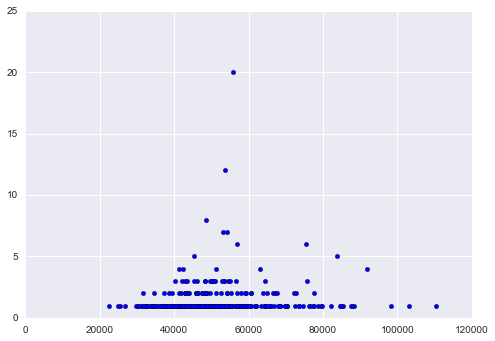

In [131]:
plt.scatter(x,y)

In [132]:
income.corr()

,county_id,county_income,county_count
county_id,1.000000,-0.032034,-0.140964
county_income,-0.032034,1.000000,0.065781
county_count,-0.140964,0.065781,1.000000


In [133]:
morethanone = income[income["county_count"]>1]

In [134]:
morethanone.corr()

,county_id,county_income,county_count
county_id,1.000000,-0.237765,-0.192916
county_income,-0.237765,1.000000,0.110924
county_count,-0.192916,0.110924,1.000000


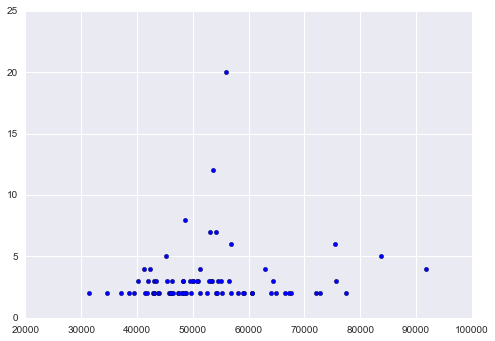

In [135]:
x2 = morethanone.county_income.squeeze()
y2 = morethanone.county_count.squeeze()
plt.scatter(x2, y2)

In [168]:
race_share = df[['geo_id','county_id','share_white', 'share_black', 'share_hispanic', 'county_income', 'p_income']]

In [169]:
race_dict = pd.value_counts(race_share.geo_id).to_dict()

In [170]:
race_share["geo_id_count"] = race_share.geo_id.map(race_dict)

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [161]:
race_share.tail()

,geo_id,county_id,share_white,share_black,share_hispanic,county_income,geo_id_count
462,51740211500,51740,40.9,53.8,0,46166,1
463,53047970400,53047,74.5,0.4,20.2,40368,1
464,37071031704,37071,83.2,10.1,0.3,42017,1
465,6001401700,6001,21.7,24.9,37.1,72112,1
466,6001441522,6001,23.1,4,12.3,72112,1


In [165]:
from pprint import pprint

pprint(df.tail(2))

                  name age  gender raceethnicity     month  day  year  \
465  Yuvette Henderson  38  Female         Black  February    3  2015   
466      Zaki Shinwary  48    Male       Unknown   January   16  2015   

                                 streetaddress     city state    ...     \
465                             3800 Hollis St  Oakland    CA    ...      
466  Lake Arrowhead Ave and Great Salt Lake Dr  Fremont    CA    ...      

     share_hispanic  p_income  h_income  county_income  comp_income  \
465            37.1     26971     63052          72112     0.874362   
466            12.3     33590     88940          72112     1.233359   

     county_bucket  nat_bucket   pov     urate   college  
465              2           4  23.9  0.069601  0.396476  
466              4           5   6.1  0.080912  0.435773  

[2 rows x 34 columns]


In [166]:
race_share.geo_id_count.value_counts()

1    450
2     14
3      3
Name: geo_id_count, dtype: int64

In [171]:
race_share[["share_white", "share_black","share_hispanic", "p_income", "geo_id_count"]].corr()

,geo_id_count
geo_id_count,1


In [174]:
race_share.p_income.astype(float)

ValueError: could not convert string to float: -

In [ ]:
race_share.